GARMENT WORKER PRODUCTIVITY ANALYSIS

Muhammad Bagaswara Sarendra

MSIB Capstone Project at Cepat Cakap Studi Independen Data Scientist 2024

LIFE CYCLE OF MACHINE LEARNING PROJECT

Data Collection And Data Understanding  
Data Cleaning  
Exploratory Data Analysis  
Data Preprocessing  
Modelling And Evaluation  
Hyperparameter Tuning  

Data Collection and Data Understanding


Source: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

This data consists of 1197 rows and 14 columns

Import Required Packages and Dataset

In [1]:
# Data Analysis and Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
import catboost as cb
from catboost import CatBoostRegressor

# Multicollinearity Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Hyperparameter Tuning and Model Evaluation
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Define the URL where the CSV file is located

In [2]:
url = 'https://raw.githubusercontent.com/bagassarendra/GarmentWorkerProductivity-CapstoneProject/refs/heads/main/garments_worker_productivity.csv'

Load data into a DataFrame from a CSV file at the given URL

In [4]:
dataset = pd.read_csv(url)

Display the first few rows of the dataset to verify it loaded correctly

In [6]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


Check the structure and dimensions of the dataset

In [7]:
dataset.shape

(1197, 15)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [9]:
dataset.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


Identify numerical and categorical columns

In [10]:
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns

print("Kolom Kategorikal:")
print(categorical_columns)
print("\nKolom Numerik:")
print(numerical_columns)

Kolom Kategorikal:
Index(['date', 'quarter', 'department', 'day'], dtype='object')

Kolom Numerik:
Index(['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')


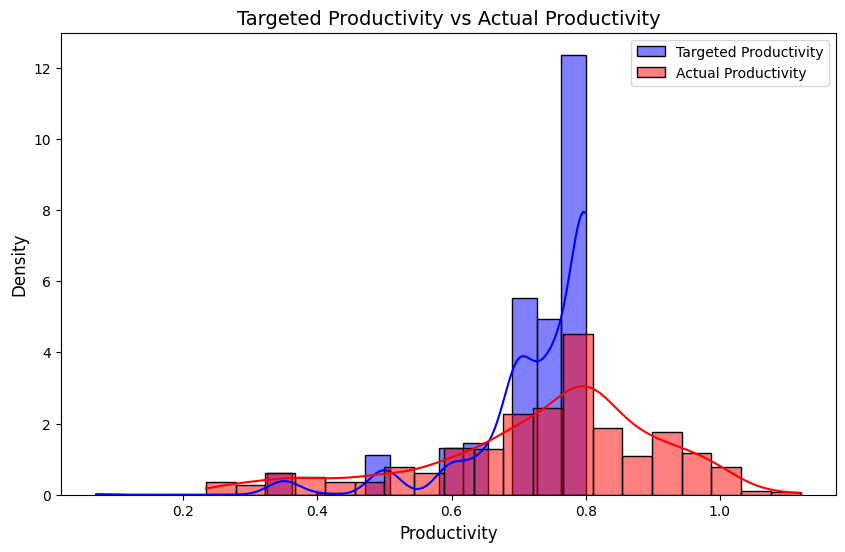

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['targeted_productivity'], kde=True, color='blue', label='Targeted Productivity', stat='density', bins=20)
sns.histplot(dataset['actual_productivity'], kde=True, color='red', label='Actual Productivity', stat='density', bins=20)
plt.title('Targeted Productivity vs Actual Productivity', fontsize=14)
plt.xlabel('Productivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

There is a very strong correlation between the targeted activity and the actual variable, indicating that an increase in one variable is directly proportional to an increase in the other.